# Does  stop-question-frisk affect the overall effectiveness of the police?

Brad Johnson and Anil Onal

Module 4 Project: Regression and classification

## Objective

We examine the relationship between the stop-question-frisk policy and arrest rates in NYC. Until a court decision in 2013, the stop-question-frisk policy was implemented in a relatively aggressive manner in NYC. Since 2013, it has been scaled down significantly due to low precision rates and the potential bias in the false positives. The policy was implemented and then downsized in the context of declining crime rates. 

## Data

The analysis is based on three datasets from the NYPD: reported offenses, arrests, and stops. These individual level data, each containing millions of records, were merged at the precinct level.        

The merged data covered 77 precincts and 9 years, 2008-13. As a part of further processing, the features were normalized using 2010 population and two outlier precincts covering the Central Park and the Garment District were eliminated due to their low residential population. Population data were made available by [John Keefe](https://johnkeefe.net/nyc-police-precinct-and-census-data) by converting block level Census data to police precincts. 

In [11]:
%run data_modeler.py

In [12]:
df.head(5)

,year,pct,stops,stop_arrests,arrests,crimes,Latitude,Longitude,population,policy,...,log_nonstop_arrestrate,log_stoprate,log_stop_arrestrate,log_arrestrate,log_nonstop_arrests,log_arrests,log_population,log_stops,log_stop_arrests,log_crimes
0,2006,1,1967,46,4024,6279,40.712577,-74.009307,66679,1,...,4.088644,3.384375,-0.371249,4.100142,8.288534,8.300032,11.107645,7.584265,3.828641,8.744966
1,2007,1,1887,117,4797,6762,40.712577,-74.009307,66679,1,...,4.251163,3.342853,0.562284,4.275856,8.451053,8.475746,11.107645,7.542744,4.762174,8.819074
2,2008,1,2506,221,5008,6614,40.712577,-74.009307,66679,1,...,4.273769,3.626553,1.198273,4.318902,8.473659,8.518792,11.107645,7.826443,5.398163,8.796944
3,2009,1,2585,238,5371,6280,40.712577,-74.009307,66679,1,...,4.343556,3.657591,1.272381,4.388879,8.543446,8.588769,11.107645,7.857481,5.472271,8.745125
4,2010,1,2446,260,4950,5895,40.712577,-74.009307,66679,1,...,4.253298,3.602319,1.360792,4.307253,8.453188,8.507143,11.107645,7.802209,5.560682,8.681860


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,962.0,2012.000000,3.743604,2006.000000,2009.000000,2012.000000,2015.000000,2018.000000
pct,962.0,63.770270,35.213342,1.000000,33.000000,66.500000,100.000000,123.000000
stops,962.0,4290.353430,5030.441904,25.000000,223.000000,2885.000000,6649.250000,31660.000000
stop_arrests,962.0,270.465696,277.896202,3.000000,47.000000,189.500000,389.750000,1471.000000
arrests,962.0,4782.505198,2697.947511,1055.000000,2832.500000,4204.500000,6032.250000,15859.000000
crimes,962.0,6556.122661,2609.934087,2418.000000,4766.250000,6241.500000,7770.000000,17532.000000
Latitude,962.0,40.728249,0.084183,40.533685,40.670921,40.722960,40.803451,40.889582
Longitude,962.0,-73.928093,0.079975,-74.199619,-73.981169,-73.937795,-73.887874,-73.737042
population,962.0,110195.364865,48297.709587,43694.000000,67065.000000,105040.500000,146441.000000,247354.000000
policy,962.0,0.538462,0.498778,0.000000,0.000000,1.000000,1.000000,1.000000


## Data visualization

Visualizations that describe the question we aimed to answer as well as its context, and the basic relationships between different features were prepared.

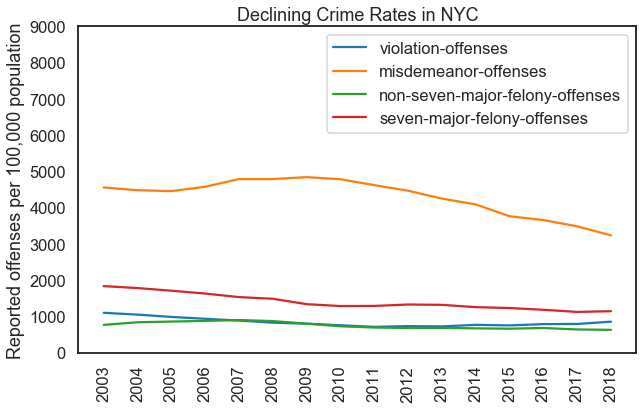

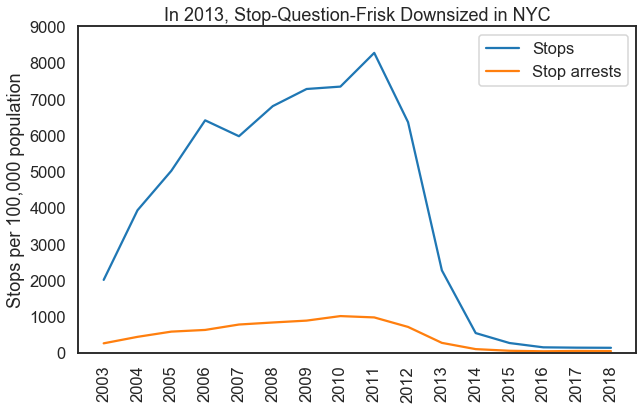

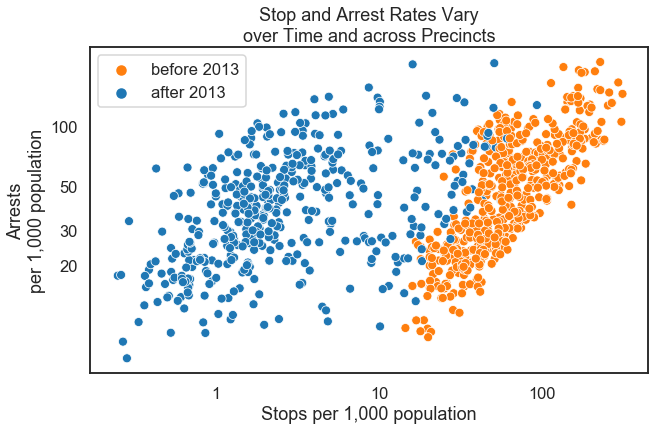

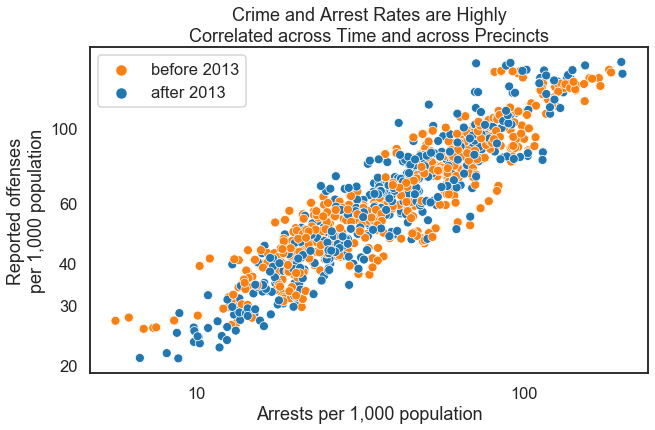

In [2]:
%matplotlib inline
%run visualizations.py

## Methodology

We first examine basic pairwise relationships between the features and the possible outcome variables. As we can see, there is extremely high correlation between complaints and arrests, and there is a very high correlation between stops and stop arrests. Other data is well correlated as well.

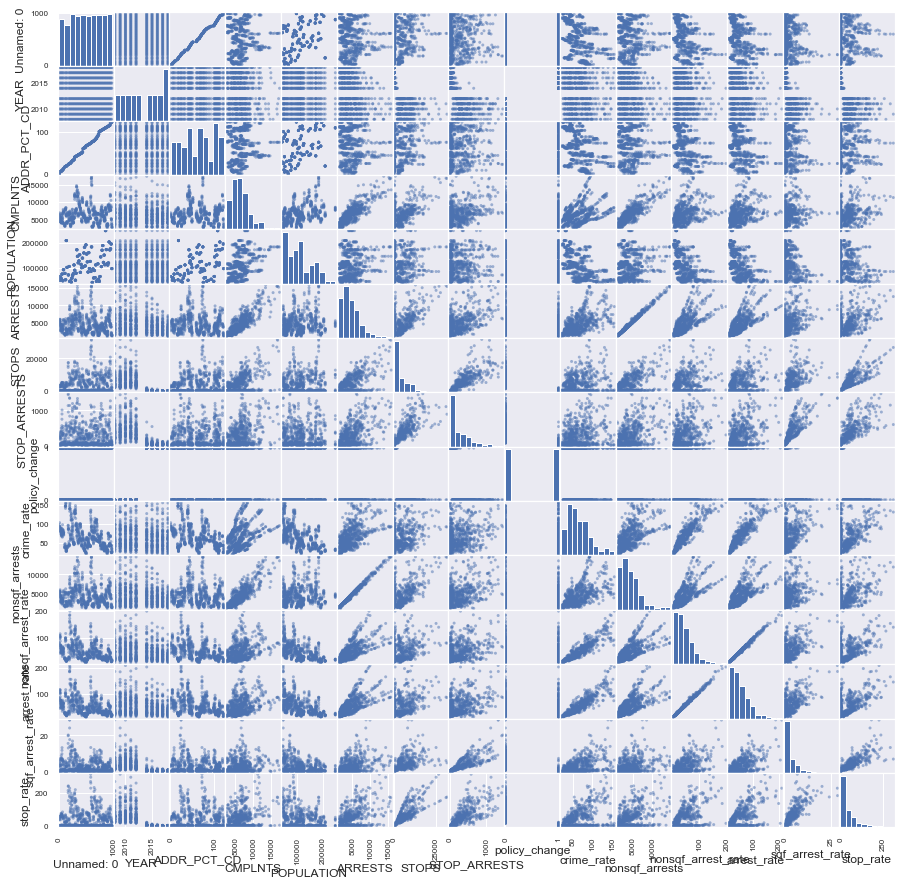

In [13]:
sns.set(rc={'figure.figsize':(15,15)})
pd.plotting.scatter_matrix(df);

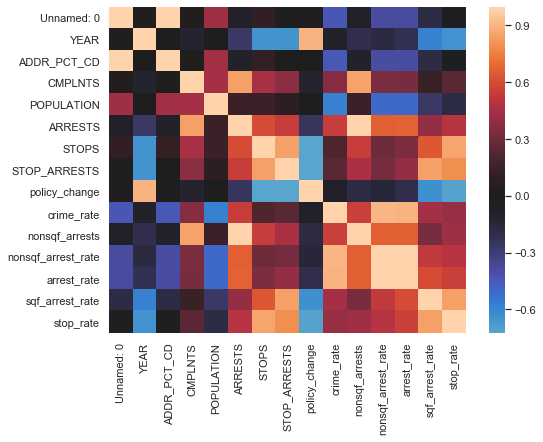

In [14]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(df.corr(), center=0);

To start our training process, we split our data into the training and test samples, after stratifying by year. Then, we fit our linear regression model to the training sample, starting with the most basic specification where y is the number of arrests excluding arrests through stop-question-frisk and X contains stops. 

In [7]:
from sklearn.model_selection import train_test_split
feats = ['stops', 'crimes', 'population', \
         'year','policy', 'pct', \
         'stoprate', 'crimerate', 'stop_arrestrate', \
         'log_stoprate', 'log_crimerate', 'log_population']
X = df[feats].values
y = df[['nonstop_arrests','nonstop_arrestrate', 'log_nonstop_arrestrate']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                    stratify = X[:,5], \
                                                    test_size = 0.2, \
                                                    random_state = 120219)

In [8]:
import statsmodels.api as sm
import numpy as np
lr = sm.OLS(y_train[:,0], sm.add_constant(X_train[:,0]), hasconst=True)
rslt = lr.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     318.7
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           7.17e-60
Time:                        12:52:15   Log-Likelihood:                -6981.1
No. Observations:                 769   AIC:                         1.397e+04
Df Residuals:                     767   BIC:                         1.398e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3320.9392    100.446     33.062      0.000    3123.758    3518.121
x1             0.2716      0.015     17.851      0.000       0.242       0.301
==============================================================================
Omnibus:                      170.208   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.794
Skew:                           1.238   Prob(JB):                     1.82e-76
Kurtosis:                       5.181   Cond. No.                     8.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We next control for crime and population as arrests should be correlated with crime and population as well.

In [9]:
lr = sm.OLS(y_train[:,0], sm.add_constant(X_train[:,0:3]), hasconst=True)
rslt = lr.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1211.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          5.25e-290
Time:                        12:53:36   Log-Likelihood:                -6442.1
No. Observations:                 769   AIC:                         1.289e+04
Df Residuals:                     765   BIC:                         1.291e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.0250    114.532     -0.271      0.787    -255.860     193.810
x1             0.0729      0.009      8.463      0.000       0.056       0.090
x2             0.9046      0.019     48.147      0.000       0.868       0.941
x3            -0.0155      0.001    -17.439      0.000      -0.017      -0.014
==============================================================================
Omnibus:                       34.275   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.537
Skew:                           0.425   Prob(JB):                     2.13e-10
Kurtosis:                       3.817   Cond. No.                     3.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In an alternative specification, we use arrest, stop, and crime rates as per 1,000 population. 

In [10]:
lr = sm.OLS(y_train[:,1], sm.add_constant(X_train[:,6:8]), hasconst=True)
rslt = lr.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     2018.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          4.74e-306
Time:                        12:55:34   Log-Likelihood:                -3035.9
No. Observations:                 769   AIC:                             6078.
Df Residuals:                     766   BIC:                             6092.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.7029      1.153    -15.354      0.000     -19.966     -15.439
x1             0.0751      0.009      7.958      0.000       0.057       0.094
x2             0.9334      0.018     52.806      0.000       0.899       0.968
==============================================================================
Omnibus:                      136.586   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.336
Skew:                           0.802   Prob(JB):                    8.30e-110
Kurtosis:                       6.620   Cond. No.                         237.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next, we try log transformation on the specification above. We call this, model 7.

In [11]:
lr = sm.OLS(y_train[:,2], sm.add_constant(X_train[:,9:11]), hasconst=True)
rslt = lr.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2437.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:58:11   Log-Likelihood:                 4.1601
No. Observations:                 769   AIC:                            -2.320
Df Residuals:                     766   BIC:                             11.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1145      0.086    -24.559      0.000      -2.283      -1.945
x1             0.0222      0.005      4.397      0.000       0.012       0.032
x2             1.3912      0.022     64.039      0.000       1.349       1.434
==============================================================================
Omnibus:                        7.255   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                9.764
Skew:                           0.065   Prob(JB):                      0.00758
Kurtosis:                       3.537   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As rates help us get rid of the warning about multicollinearity, and log transformation improves the fit, we stick with this specification and add policy dummy, a linear time trend, and population(in log form). Among all specifications we fit, the one below with X including crime rate, stop rate, and population appears to work best in terms of R2 and multicollinearity. 

In [16]:
lr = sm.OLS(y_train[:,2], sm.add_constant(X_train[:,9:12]), hasconst=True)
rslt = lr.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1623.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:09:31   Log-Likelihood:                 4.1742
No. Observations:                 769   AIC:                           -0.3484
Df Residuals:                     765   BIC:                             18.23
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0554      0.363     -5.668      0.000      -2.767      -1.344
x1             0.0223      0.005      4.395      0.000       0.012       0.032
x2             1.3883      0.028     50.330      0.000       1.334       1.442
x3            -0.0041      0.025     -0.168      0.867      -0.052       0.044
==============================================================================
Omnibus:                        7.096   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                9.521
Skew:                           0.062   Prob(JB):                      0.00856
Kurtosis:                       3.531   Cond. No.                         525.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We test the specification above for multicollinearity and find that two of the terms have VIFs greater than 5. We drop population.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
feats8 = feats[9:12]
vif = [variance_inflation_factor(X_train[:,9:12], i) for i in range(X_train[:,9:12].shape[1])]
list(zip(feats, vif))

[('log_stoprate', 3.509315631643717),
 ('log_crimerate', 66.6236317694398),
 ('log_population', 59.99421549507721)]

In [19]:
feats7 = feats[9:11]
vif = [variance_inflation_factor(X_train[:,9:11], i) for i in range(X_train[:,9:11].shape[1])]
list(zip(feats, vif))

[('log_stoprate', 3.4043331870857068), ('log_crimerate', 3.4043331870857068)]

After experimenting with different specifications, we stick with Model 7. The following contains all alternative specifications we fit onto our training sample. 

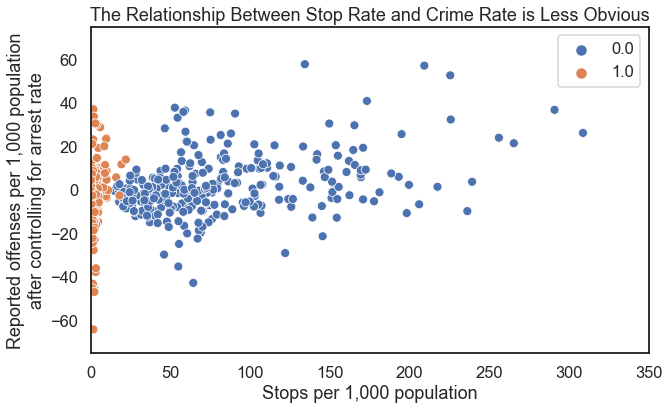

In [30]:
%run training-testing.py

In [21]:
!pip install yellowbrick

     |████████████████████████████████| 389kB 3.6MB/s eta 0:00:01


## Test Results and Conclusion
As the final step, we test our model with the test sample.

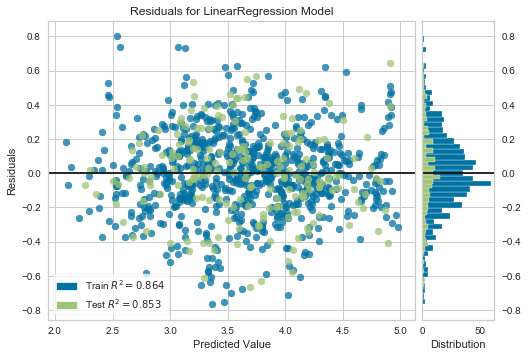

In [27]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train[:,9:11], y_train[:,2])  # Fit the training data to the visualizer
visualizer.score(X_test[:,9:11], y_test[:,2])  # Evaluate the model on the test data
visualizer.show()

Text(0.5, 1.0, 'Linear Regression')

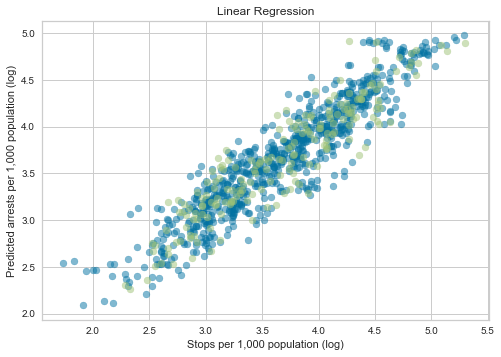

In [37]:
lr = sm.OLS(y_train[:,2], sm.add_constant(X_train[:,9:11]), hasconst=True)
rslt = lr.fit()
y_hat_train = rslt.predict(sm.add_constant(X_train[:,9:11]))
y_hat_test = rslt.predict(sm.add_constant(X_test[:,9:11]))
plt.scatter(y_train[:,2], y_hat_train, alpha=0.5)
plt.scatter(y_test[:,2], y_hat_test, alpha=0.5)
plt.xlabel('Stops per 1,000 population (log)')
plt.ylabel('Predicted arrests per 1,000 population (log)')
plt.title('Linear Regression')

All in all, we find that stop rates have a positive relationship with the arrest rates, after arrests through stops are excluded. However, the size appears small. 

## Future Research
The main avenue for future research is to make the leap to crime rates i.e. the question of whether stops have an impact on crime rates. However, to answer this question, one needs to answer the following questions:
- How to include other factors underlying the crime rate
- How to address the chicken-and-egg problem between crime and arrests
- What would be a better model?
- What would be a better dataset?
- What can we uncover from individual-level data?